In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout 
from tensorflow.keras.utils import to_categorical as to_cat
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import zipfile

### Model Development 

In [2]:
TRAIN_DATA = "./data/Rock-Paper-Scissors/train/"
TEST_DATA  =  "./data/Rock-Paper-Scissors/test/"

In [3]:
train_datagen  =  ImageDataGenerator(
    rescale=1/255,
    width_shift_range=20,
    height_shift_range=20,
    shear_range=20,
    zoom_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
)


test_datagen  =  ImageDataGenerator(
    rescale=1/255,
    width_shift_range=20,
    height_shift_range=20,
    shear_range=20,
    zoom_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
train_data = train_datagen.flow_from_directory(
    TRAIN_DATA,
    target_size=(150,150),
    class_mode='categorical'
)

test_data = train_datagen.flow_from_directory(
    TEST_DATA,
    target_size=(150,150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### Model 

In [5]:
model =  Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Dropout(0.2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(3,activation='softmax')
    
])

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [7]:
history  =  model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
79/79 [==============================] - 45s 566ms/step - loss: 2.8529 - acc: 0.3286 - val_loss: 1.0986 - val_acc: 0.3360
Epoch 2/10
79/79 [==============================] - 47s 590ms/step - loss: 1.1385 - acc: 0.3440 - val_loss: 1.0988 - val_acc: 0.3333
Epoch 3/10
79/79 [==============================] - 46s 584ms/step - loss: 1.1030 - acc: 0.3480 - val_loss: 1.0983 - val_acc: 0.3414
Epoch 4/10
79/79 [==============================] - 46s 588ms/step - loss: 1.1393 - acc: 0.3710 - val_loss: 1.0996 - val_acc: 0.3360
Epoch 5/10
79/79 [==============================] - 46s 576ms/step - loss: 1.1262 - acc: 0.3825 - val_loss: 1.0982 - val_acc: 0.3495
Epoch 6/10
79/79 [==============================] - 46s 577ms/step - loss: 1.0976 - acc: 0.4099 - val_loss: 1.0890 - val_acc: 0.3656
Epoch 7/10
79/79 [==============================] - 45s 574ms/step - loss: 1.0993 - acc: 0.4341 - val_loss: 1.0618 - val_acc: 0.4194
Epoch 8/10
79/79 [==============================] - 46s 583ms/step - 

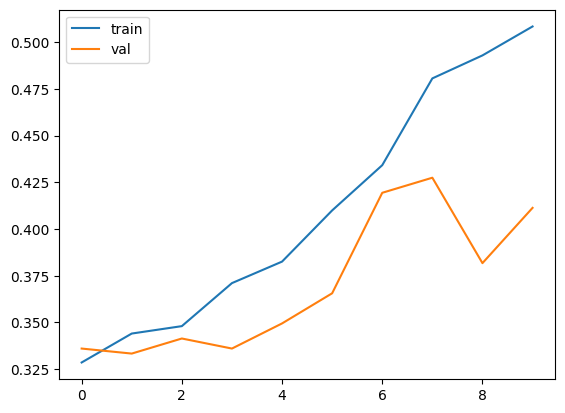

In [8]:
## Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')

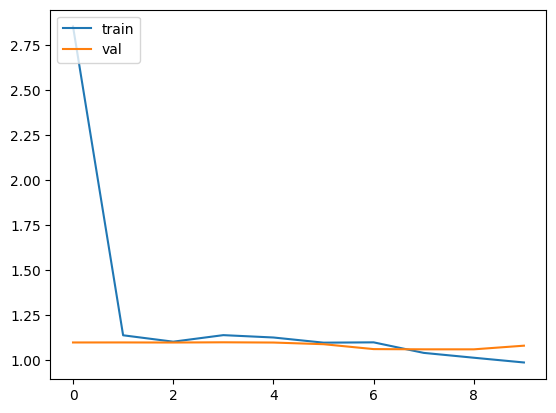

In [9]:
## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

In [11]:
### THE MODEL IS NOT SO GOOD AND YOU CANT USE IT 